In [1]:
import yfinance as yf
import pandas as pd

In [2]:
def getClose(tickers):
    dfVariacao = pd.DataFrame(columns=['year'])
    for ticker in tickers:
        print(ticker)
        df=yf.Ticker(ticker).history(period='max')
        df.reset_index(inplace=True)
        df['year']=df.Date.dt.year
        df=df.groupby('year', as_index=False)['Close'].last()
        
        dfAux=pd.DataFrame()
        dfAux['year']=df['year']
        dfAux[ticker]=df['Close'].pct_change()
        if len(dfVariacao)==0:
            dfVariacao=dfAux
        else:
            dfVariacao=dfVariacao.merge(dfAux, how='left')
        #print(dfVariacao.head())
    dfVariacao.set_index(['year'], inplace=True)
    return dfVariacao
    


In [3]:
tickers=[
    'PETR4.SA',
    'WEGE3.SA',
    'ITSA4.SA',
    'KNRI11.SA',
    'HGRE11.SA',
    'HGLG11.SA',
    'SAAG11.SA',
    #'BCFF11.SA',
    'PSSA3.SA',
    'ABEV3.SA'
]
df=getClose(tickers)
df=df[-4:-1]

PETR4.SA
WEGE3.SA
ITSA4.SA
KNRI11.SA
HGRE11.SA
HGLG11.SA
SAAG11.SA
PSSA3.SA
ABEV3.SA


### Como investimento livre de risco, adotaremos a taxa de 6% que é a vigente em 2019:
2018: 6,5%
2017: 7%
2016: 13,75%

In [10]:
df['SELIC']=0.06
tickers.append('SELIC')

In [11]:

returns_annual = df.mean()

# get daily and covariance of returns of the stock
cov_annual = df.cov()

In [12]:
import numpy as np
selected=tickers
port_returns = []
port_volatility = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 5000

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' weight'] = [weight[counter] for weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility'] + [stock+' weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]
max_ret=df['Returns'].max()
max_vol=df['Volatility'].min()
df.head()

,Returns,Volatility,PETR4.SA weight,WEGE3.SA weight,ITSA4.SA weight,KNRI11.SA weight,HGRE11.SA weight,HGLG11.SA weight,SAAG11.SA weight,PSSA3.SA weight,ABEV3.SA weight,SELIC weight
0,0.224186,0.091490,0.100459,0.089103,0.092798,0.096811,0.146779,0.063398,0.116157,0.136260,0.134460,0.023774
1,0.232288,0.099621,0.082770,0.061478,0.184002,0.083340,0.232652,0.205394,0.045456,0.023414,0.016259,0.065237
2,0.243641,0.104751,0.154877,0.088926,0.134000,0.037898,0.024972,0.140237,0.145007,0.050584,0.083144,0.140354
3,0.241988,0.105671,0.173312,0.151752,0.015529,0.034826,0.127141,0.172551,0.112284,0.078009,0.071351,0.063245
4,0.226554,0.135728,0.158018,0.193876,0.004966,0.112792,0.065965,0.082055,0.207937,0.047040,0.076388,0.050962


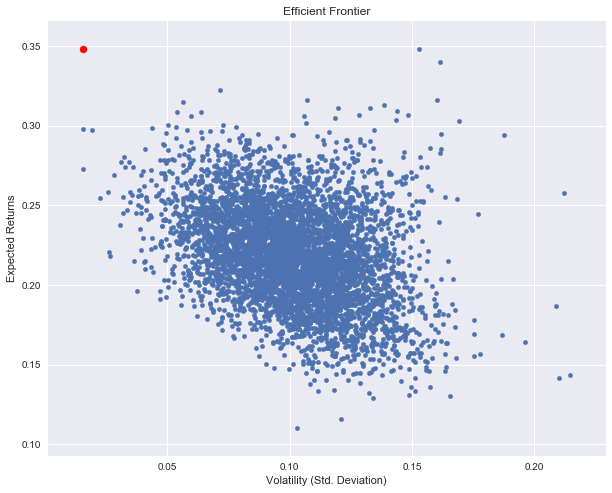

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
df.plot.scatter(x='Volatility', y='Returns', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.scatter(max_vol, max_ret,c='red', s=50) # red dot
plt.show()

In [157]:
df[1:100].to_csv('mark1.csv',sep=';',decimal=',')